Sections:


1. <a href="#sec1"> Imports </a>
2. <a href="#sec2"> Load data </a>
3. <a href="#sec3"> Visualizing and exploring data </a>
    * <a href="#sec30"> data reshaping </a>
    * <a href="#sec31"> visualization </a>
    * <a href="#sec32"> mean image per class </a>
    * <a href="#sec33"> mean image pixels per class </a>
4. <a href="#sec4"> Pre-processing </a>
    * <a href="#sec41"> labels </a>
    * <a href="#sec42"> data normalization </a>
    * <a href="#sec43"> data split </a>
5. <a href="#sec5"> Define and train model </a>
6. <a href="#sec6"> Evaluate model </a>
7. <a href="#sec7"> Predict on test data </a>
    * <a href="#sec71"> generate submission </a>
8. <a href="#sec8"> Potential next steps </a>


<a id="sec1"></a>
## 1. Imports

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

<a id="sec2"></a>
## 2. Load data

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [4]:
df_train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

print(df_train.shape)
print(df_test.shape)

(42000, 785)
(28000, 784)


In [5]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x_train_temp = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train.iloc[:, 0])

x_test = np.array(df_test)

<a id="sec3"></a>
## 3. Visualizing and exploring data

<a id="sec30"></a>
### data reshaping

In [8]:
N_train_samples = x_train_temp.shape[0]
x_train = x_train_temp.reshape(N_train_samples, 28, 28, 1)

<a id="sec31"></a>
### visualization

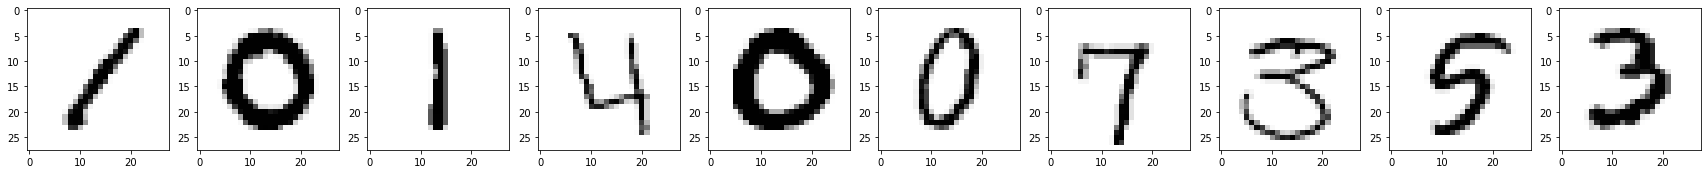

In [9]:
plt.figure(figsize=(30, 15))

n = 10

for i in range(n):
    plt.subplot(1, n, i+1)
    img = x_train[i]
    plt.imshow(img, cmap='Greys')
plt.show()

<a id="sec32"></a>
### mean image per class

In [10]:
def get_class_arrays(class_index):
    return x_train[y_train==class_index],y_train[y_train==class_index]

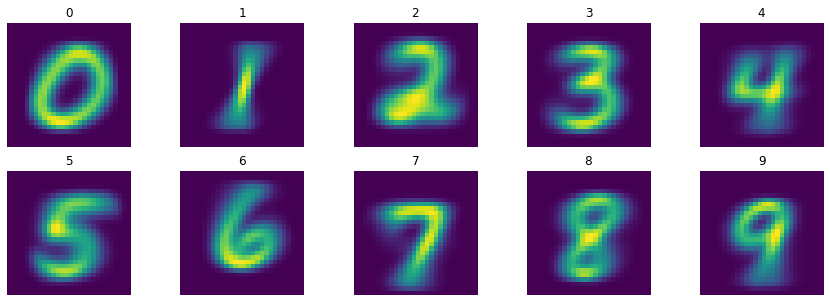

In [11]:
def get_mean_images():
    for i in range(10):
        class_arrayX, class_arrayY = get_class_arrays(i)
        mean_image = class_arrayX.mean(axis=0)
        plt.subplot(2, 5, i+1)
        plt.axis("off")
        plt.title(i)
        plt.imshow(mean_image.squeeze())
        
plt.figure(figsize=(15, 5))
get_mean_images()

<a id="sec33"></a>
### mean image pixels per class

mean images distribution (mean of all pixels, from all images per class). Note that pixel values are in range 0-255.

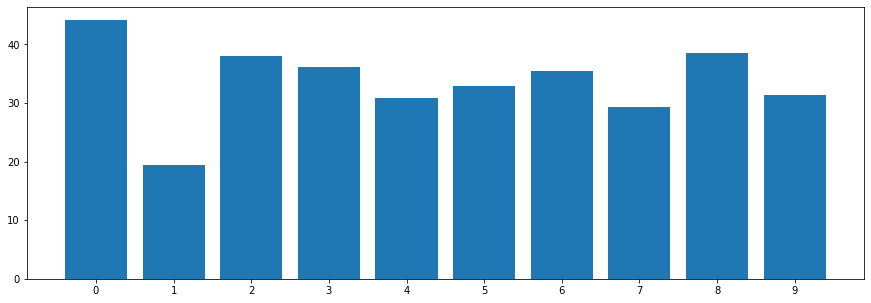

In [12]:
def get_mean_barchart():
    mean_values =[]
    for i in range(10):
        class_arrayX,class_arrayY = get_class_arrays(i)
        mean_values.append(class_arrayX.mean())
    
    plt.bar(np.arange(10), mean_values)
    plt.xticks(np.arange(10))
    
plt.figure(figsize=(15, 5))
get_mean_barchart()

<a id="sec4"></a>
## 4. Pre-processing

<a id="sec41"></a>
### labels

In [13]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [14]:
y_cat_train = to_categorical(y_train)
y_cat_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

<a id="sec42"></a>
### data normalization

In [15]:
x_train = x_train/255

##### <a id="sec43"></a>
### data split

In [16]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_cat_train, test_size=0.2, random_state=42)

<a id="sec5"></a>
## 5. Define and train model

In [17]:
model = Sequential()

model.add(Conv2D(6,(5,5), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(16, (5,5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2))),
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 6)         24        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 16)          64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

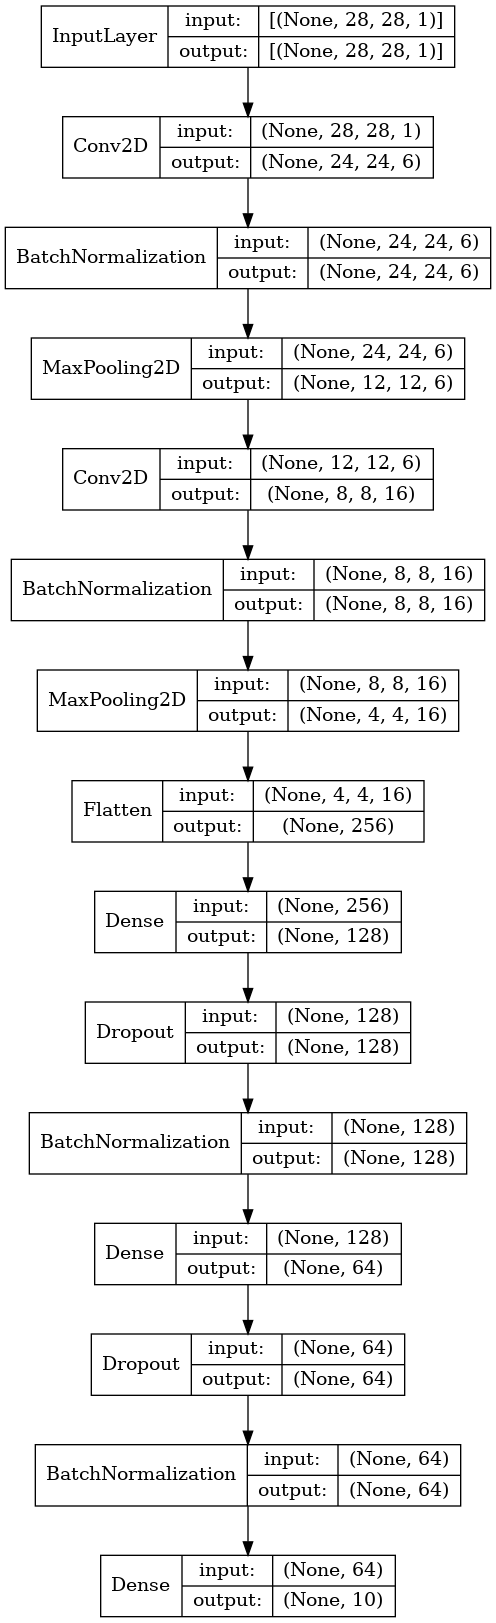

In [19]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [20]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=5)

In [21]:
# TRAIN MODEL

model.fit(X_train,
          Y_train, 
          epochs=50, 
          validation_data=(X_val, Y_val),
          callbacks=[early_stop])

Epoch 1/50
1050/1050 [==============================] - 19s 17ms/step - loss: 0.7603 - accuracy: 0.7641 - val_loss: 0.1079 - val_accuracy: 0.9689
Epoch 2/50
1050/1050 [==============================] - 17s 16ms/step - loss: 0.1721 - accuracy: 0.9505 - val_loss: 0.0746 - val_accuracy: 0.9761
Epoch 3/50
1050/1050 [==============================] - 17s 16ms/step - loss: 0.1277 - accuracy: 0.9629 - val_loss: 0.1192 - val_accuracy: 0.9605
Epoch 4/50
1050/1050 [==============================] - 17s 16ms/step - loss: 0.1027 - accuracy: 0.9701 - val_loss: 0.0475 - val_accuracy: 0.9842
Epoch 5/50
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0814 - accuracy: 0.9758 - val_loss: 0.0406 - val_accuracy: 0.9870
Epoch 6/50
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0812 - accuracy: 0.9768 - val_loss: 0.0340 - val_accuracy: 0.9881
Epoch 7/50
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0740 - accuracy: 0.9776 - val_loss: 0.0377 -

<a id="sec6"></a>
## 6. Evaluate model

In [22]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.419695,0.875208,0.107934,0.968929
1,0.155460,0.954524,0.074582,0.976071
2,0.120229,0.964762,0.119217,0.960476
3,0.099233,0.970565,0.047500,0.984167
4,0.084124,0.974940,0.040576,0.987024
5,0.078703,0.977024,0.034050,0.988095
6,0.072675,0.978542,0.037674,0.987381
7,0.063397,0.981310,0.034279,0.988333
8,0.055955,0.983304,0.036015,0.988690
9,0.053382,0.984464,0.030674,0.990833


<AxesSubplot:>

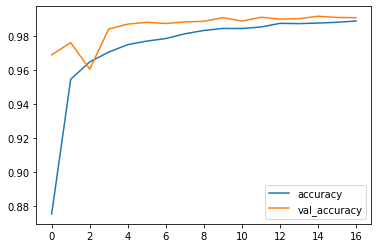

In [23]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

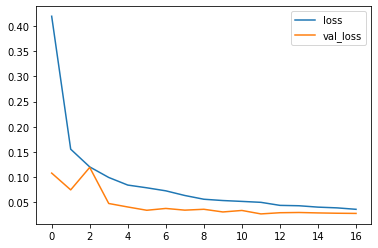

In [24]:
losses[['loss','val_loss']].plot()

In [25]:
pred_val = np.argmax(model.predict(X_val), axis=1)
real_val = np.argmax(Y_val, axis=1)

In [26]:
print(classification_report(real_val, pred_val))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       816
           1       0.99      1.00      1.00       909
           2       0.99      0.99      0.99       846
           3       0.99      0.98      0.99       937
           4       0.98      0.99      0.99       839
           5       0.99      0.99      0.99       702
           6       0.99      0.99      0.99       785
           7       0.99      0.99      0.99       893
           8       0.99      0.99      0.99       835
           9       1.00      0.98      0.99       838

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



In [27]:
confusion_matrix(real_val, pred_val)

array([[815,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 906,   1,   0,   0,   0,   1,   1,   0,   0],
       [  1,   2, 838,   0,   1,   0,   0,   3,   1,   0],
       [  1,   0,   5, 922,   0,   3,   1,   1,   3,   1],
       [  1,   1,   0,   0, 832,   0,   1,   2,   0,   2],
       [  0,   0,   0,   4,   1, 694,   2,   1,   0,   0],
       [  1,   1,   0,   0,   1,   0, 781,   0,   1,   0],
       [  0,   1,   4,   0,   0,   0,   0, 887,   0,   1],
       [  2,   1,   0,   1,   0,   1,   3,   1, 826,   0],
       [  0,   0,   0,   0,   9,   2,   0,   4,   1, 822]])

<a id="sec7"></a>
## 7. Predict on test data

In [28]:
N_test_samples = x_test.shape[0]

x_test_new = x_test.reshape(N_test_samples, 28, 28, 1)
x_test_new = x_test_new/255

x_test_new.shape

(28000, 28, 28, 1)

In [29]:
predictions = model.predict(x_test_new)

print(predictions.shape)

predictions

(28000, 10)


array([[1.7486277e-09, 7.0411250e-09, 9.9999988e-01, ..., 8.2090061e-08,
        2.7559074e-10, 1.3288758e-09],
       [9.9999022e-01, 2.2852918e-08, 2.7329264e-07, ..., 2.3626990e-06,
        7.4576803e-08, 7.5487310e-07],
       [5.9546259e-08, 1.5198884e-07, 2.6866082e-06, ..., 1.3144535e-07,
        1.4277086e-04, 9.9974293e-01],
       ...,
       [2.8058937e-08, 6.2928237e-08, 2.1915255e-07, ..., 5.4859851e-07,
        4.7273519e-07, 4.5733677e-07],
       [7.6392922e-07, 9.2375736e-08, 6.7439606e-07, ..., 1.5508758e-05,
        4.9109212e-06, 9.9977833e-01],
       [5.1567635e-09, 1.6101746e-08, 9.9999964e-01, ..., 2.9189600e-08,
        1.2279780e-07, 2.2886196e-08]], dtype=float32)

In [30]:
final_pred = np.argmax(predictions, axis=1)

final_pred

array([2, 0, 9, ..., 3, 9, 2])

Predicted value: 5



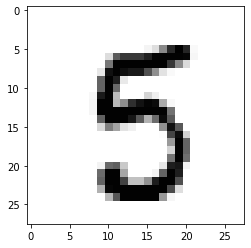

In [31]:
# Visualize some test prediction and corresponding digit 

test_index = 10

plt.imshow(x_test_new[test_index], cmap='Greys')
print(f"Predicted value: {final_pred[test_index]}\n")


<a id="sec71"></a>
### generate submission

In [32]:
pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [33]:
submission_dict = {"ImageId": [i+1 for i in range(28000)],
                   "Label": final_pred}

sub_df = pd.DataFrame(submission_dict)

sub_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [36]:
sub_df.to_csv("submission.csv", index=False)

<a id="sec8"></a>
## 8. Potential next steps

* explore (histogram? nonzero per class?)
* feature selection (crop and other methods)?
* dimensionality reduction?
* data augmentation?
* cross validation?
* more complex CNN?
* grid search?
* compare to simpler approach (cosine similarity? svm?)